<a href="https://colab.research.google.com/github/madixson/EmployeeChurnHR_Project/blob/main/AttritionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Employee Churn

In [ ]:
#the basics
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

#sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

#Bayes
from sklearn.naive_bayes import GaussianNB

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# NN
from keras.models import Sequential
from keras.layers import Dense

# ------------------Cleaning------------------

In [ ]:
df_raw = pd.read_csv('/content/drive/MyDrive/HR_AttritionProject/EmployeeData.csv')
df_raw.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Check & Remove any Null Values

In [ ]:
df = df_raw.dropna()

#### There are no null values to remove

## Check and Remove Outliers

In [ ]:
def plot_boxplot(df, feature):
    print(feature)
    df.boxplot(column=[feature])
    plt.grid(False)
    plt.show()


satisfaction_level


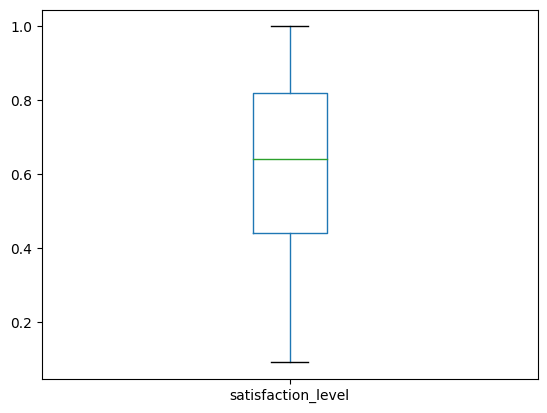

last_evaluation


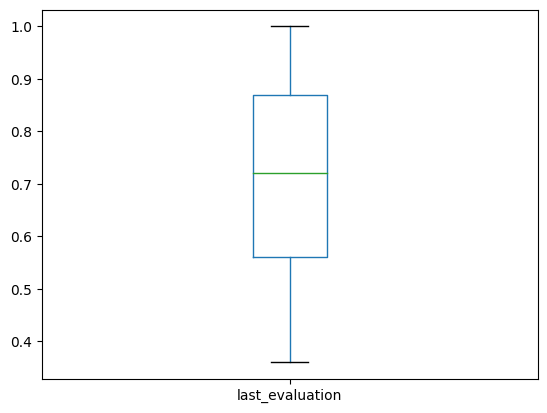

number_project


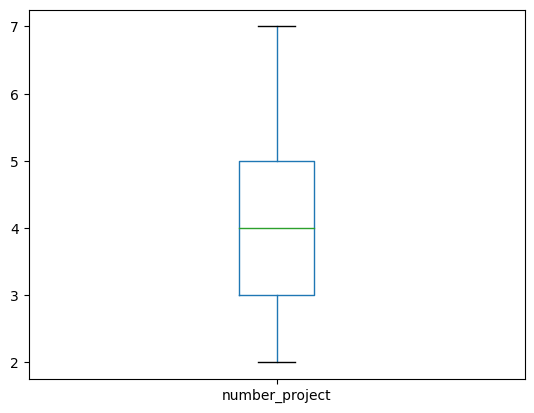

average_montly_hours


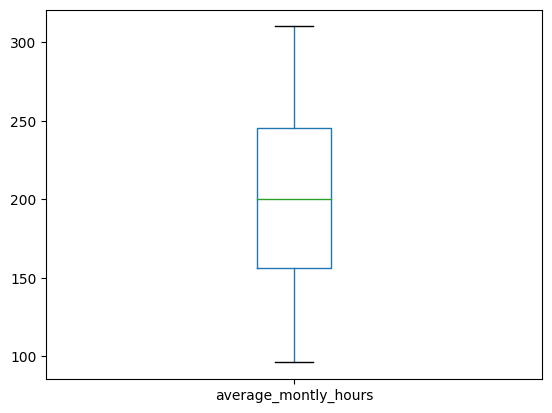

time_spend_company


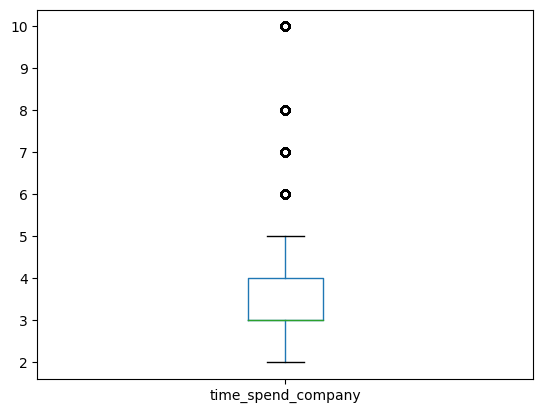

In [ ]:
#boxplots for all of our numerical values
plot_boxplot(df, 'satisfaction_level')
plot_boxplot(df, 'last_evaluation')
plot_boxplot(df, 'number_project')
plot_boxplot(df, 'average_montly_hours')
plot_boxplot(df, 'time_spend_company')

#### Overall I feel the outliers present in 'time_spend_company' were relevant ans should stay in the data for us to analyze

### Change categorical to numerical

In [ ]:
#Encode categotical variable
datacat = df.select_dtypes(exclude=["number"])
LE=LabelEncoder()
for i in datacat:
    df[i]=df[[i]].apply(LE.fit_transform)

In [ ]:
orig = df
target = df['left']
df = df.drop(['left'], axis =1)

In [ ]:
#This is the numerical dataset
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,0,7,1
1,0.80,0.86,5,262,6,0,0,7,2
2,0.11,0.88,7,272,4,0,0,7,2
3,0.72,0.87,5,223,5,0,0,7,1
4,0.37,0.52,2,159,3,0,0,7,1


 # ----------------------------EDA----------------------------

In [ ]:
#color palette
pal = ['#0f39f7', '#fcf00a']
b = '#0f39f7'
y = '#fcf00a'

In [ ]:
list(orig.columns)

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [ ]:
orig.shape

(14999, 10)

In [ ]:
orig.replace((1, 0), ('left', 'stayed'), inplace=True)

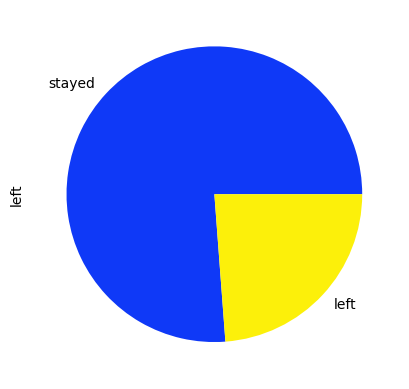

In [ ]:
orig['left'].value_counts().plot.pie( colors = pal)
plt.show()

In [ ]:
orig.replace(('left', 'stayed'), (1,0), inplace=True)
g = orig.groupby(['left'])
c1 = g.get_group(1)
c2 = g.get_group(0)

In [ ]:
def compare(df, ft):
    sns.distplot(c1[ft], color = y, hist=False)
    sns.distplot(c2[ft], color = b, hist=False)
    plt.legend(labels=["left","stayed"])
    plt.show()

<ipython-input-37-97e6ac50e222>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-37-97e6ac50e222>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


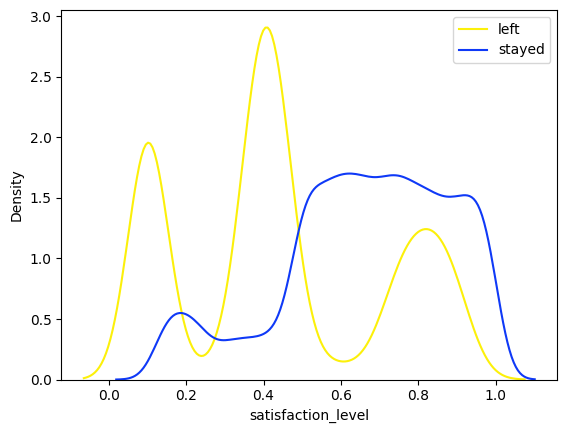

<ipython-input-37-97e6ac50e222>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-37-97e6ac50e222>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


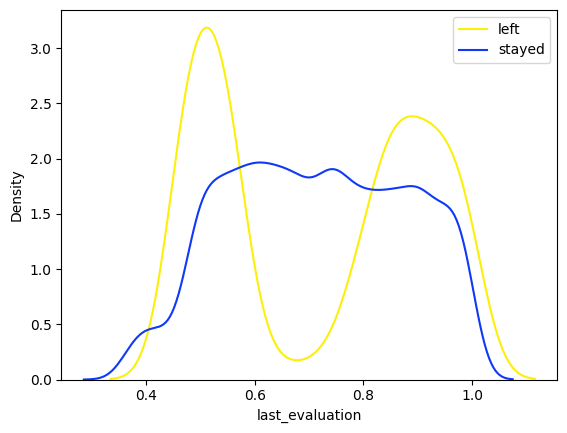

<ipython-input-37-97e6ac50e222>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-37-97e6ac50e222>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


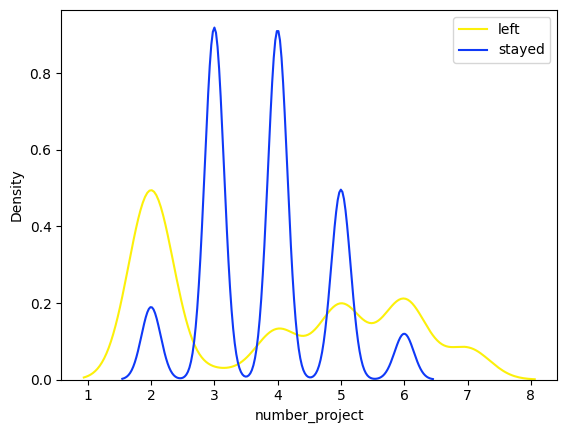

<ipython-input-37-97e6ac50e222>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-37-97e6ac50e222>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


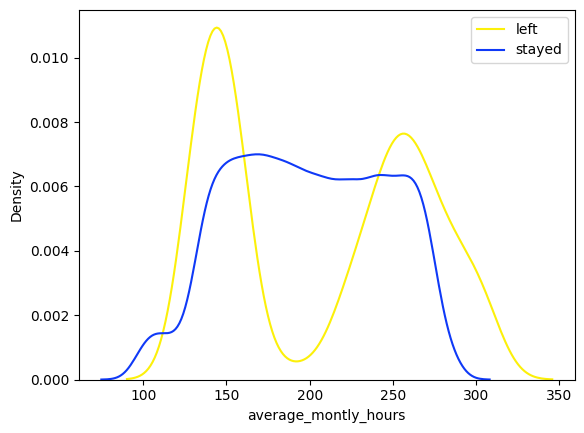

<ipython-input-37-97e6ac50e222>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-37-97e6ac50e222>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


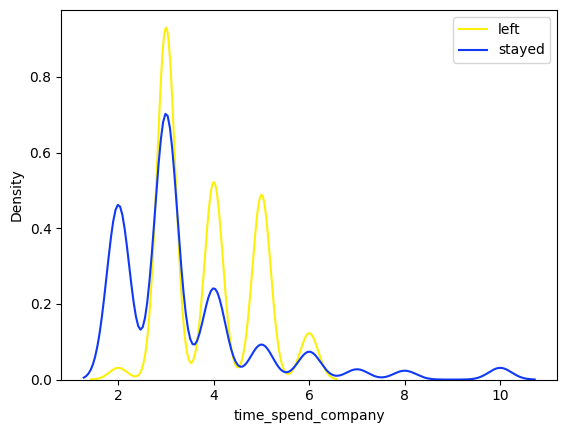

<ipython-input-37-97e6ac50e222>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-37-97e6ac50e222>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


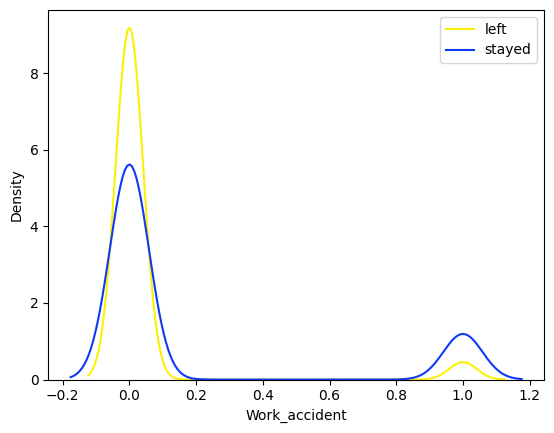

<ipython-input-37-97e6ac50e222>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
<ipython-input-37-97e6ac50e222>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density p

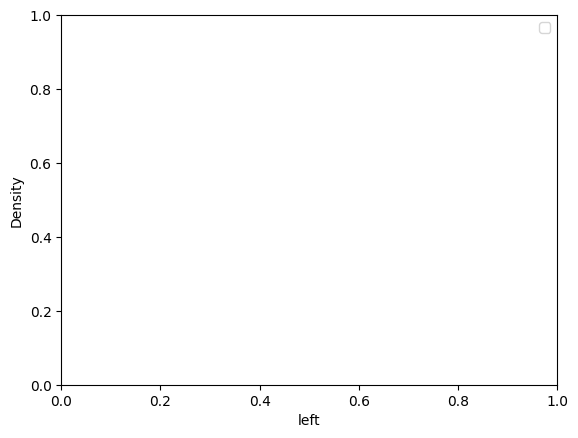

<ipython-input-37-97e6ac50e222>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-37-97e6ac50e222>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


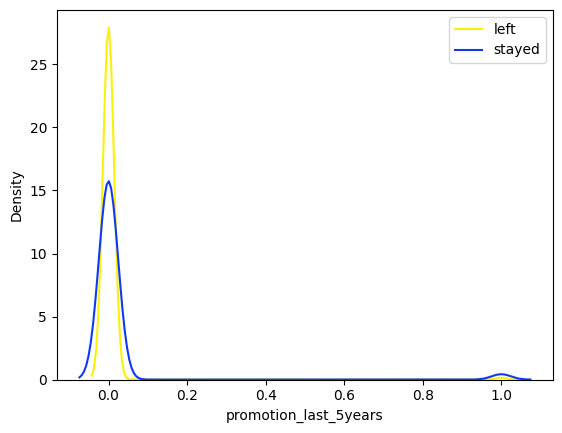

<ipython-input-37-97e6ac50e222>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-37-97e6ac50e222>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


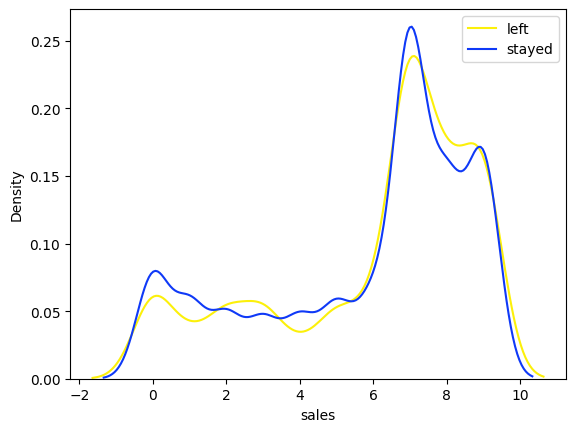

<ipython-input-37-97e6ac50e222>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c1[ft], color = y, hist=False)
<ipython-input-37-97e6ac50e222>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(c2[ft], color = b, hist=False)


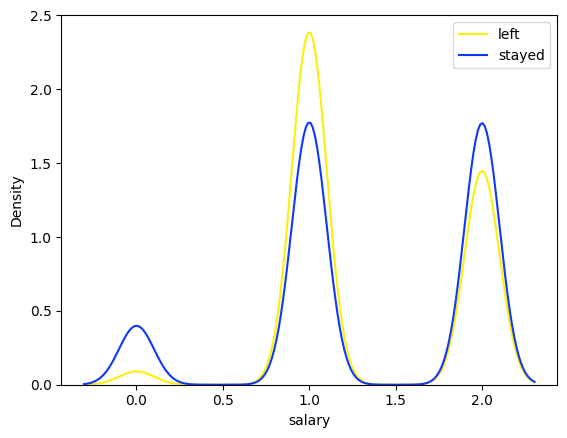

In [ ]:
for feature in orig:
    compare(orig, feature)

## Correlation

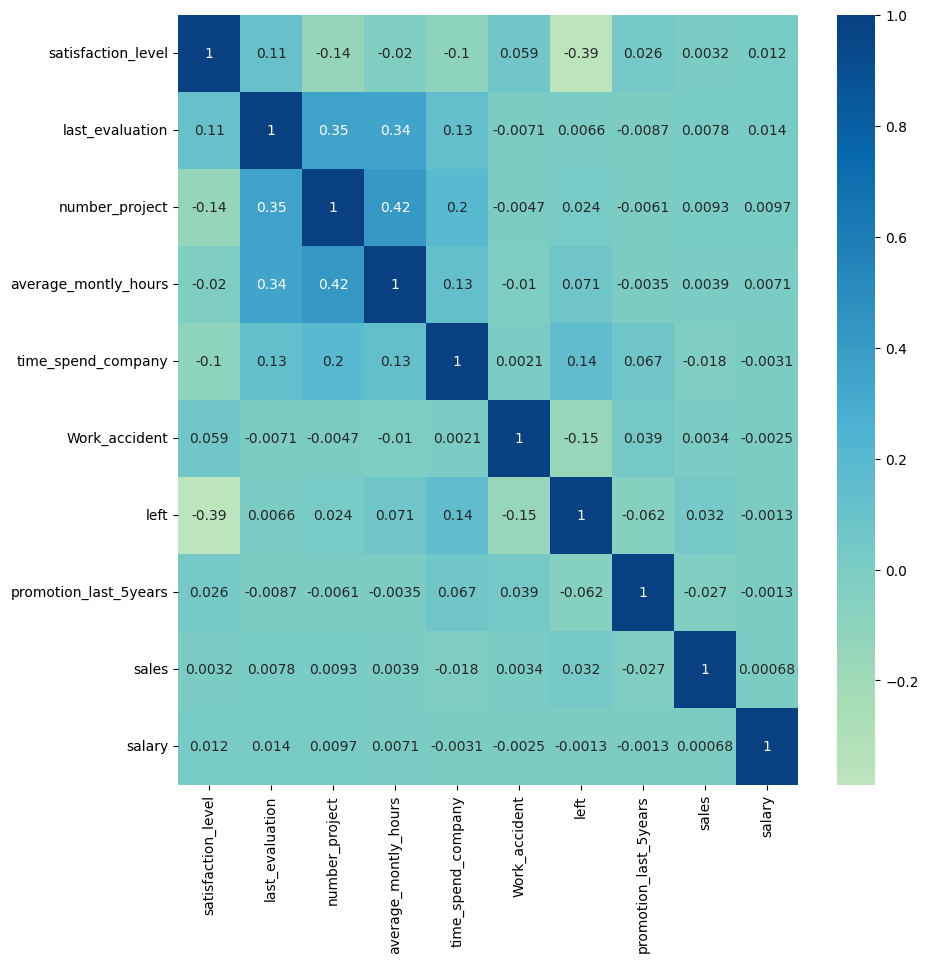

In [ ]:
corrmat= orig.corr()
plt.figure(figsize=(10,10))  
sns.heatmap(corrmat,annot=True,cmap = 'GnBu', center=0)
plt.show()

# -----------------------MODELS-----------------------

### Prepping for models

In [ ]:
#Label predictive variable and remove from orig dataset & convert to np array
y = np.array(target)
X = np.array(df)
feature_list = list(df.columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3)

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 2, metric = 'euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=2)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3388   66]
 [  70  976]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3454
           1       0.94      0.93      0.93      1046

    accuracy                           0.97      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



## Random Forest

In [ ]:
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
# predictions
rfc_predict = rfc.predict(X_test)

In [ ]:
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3388   66]
 [  70  976]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3454
           1       0.94      0.93      0.93      1046

    accuracy                           0.97      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500



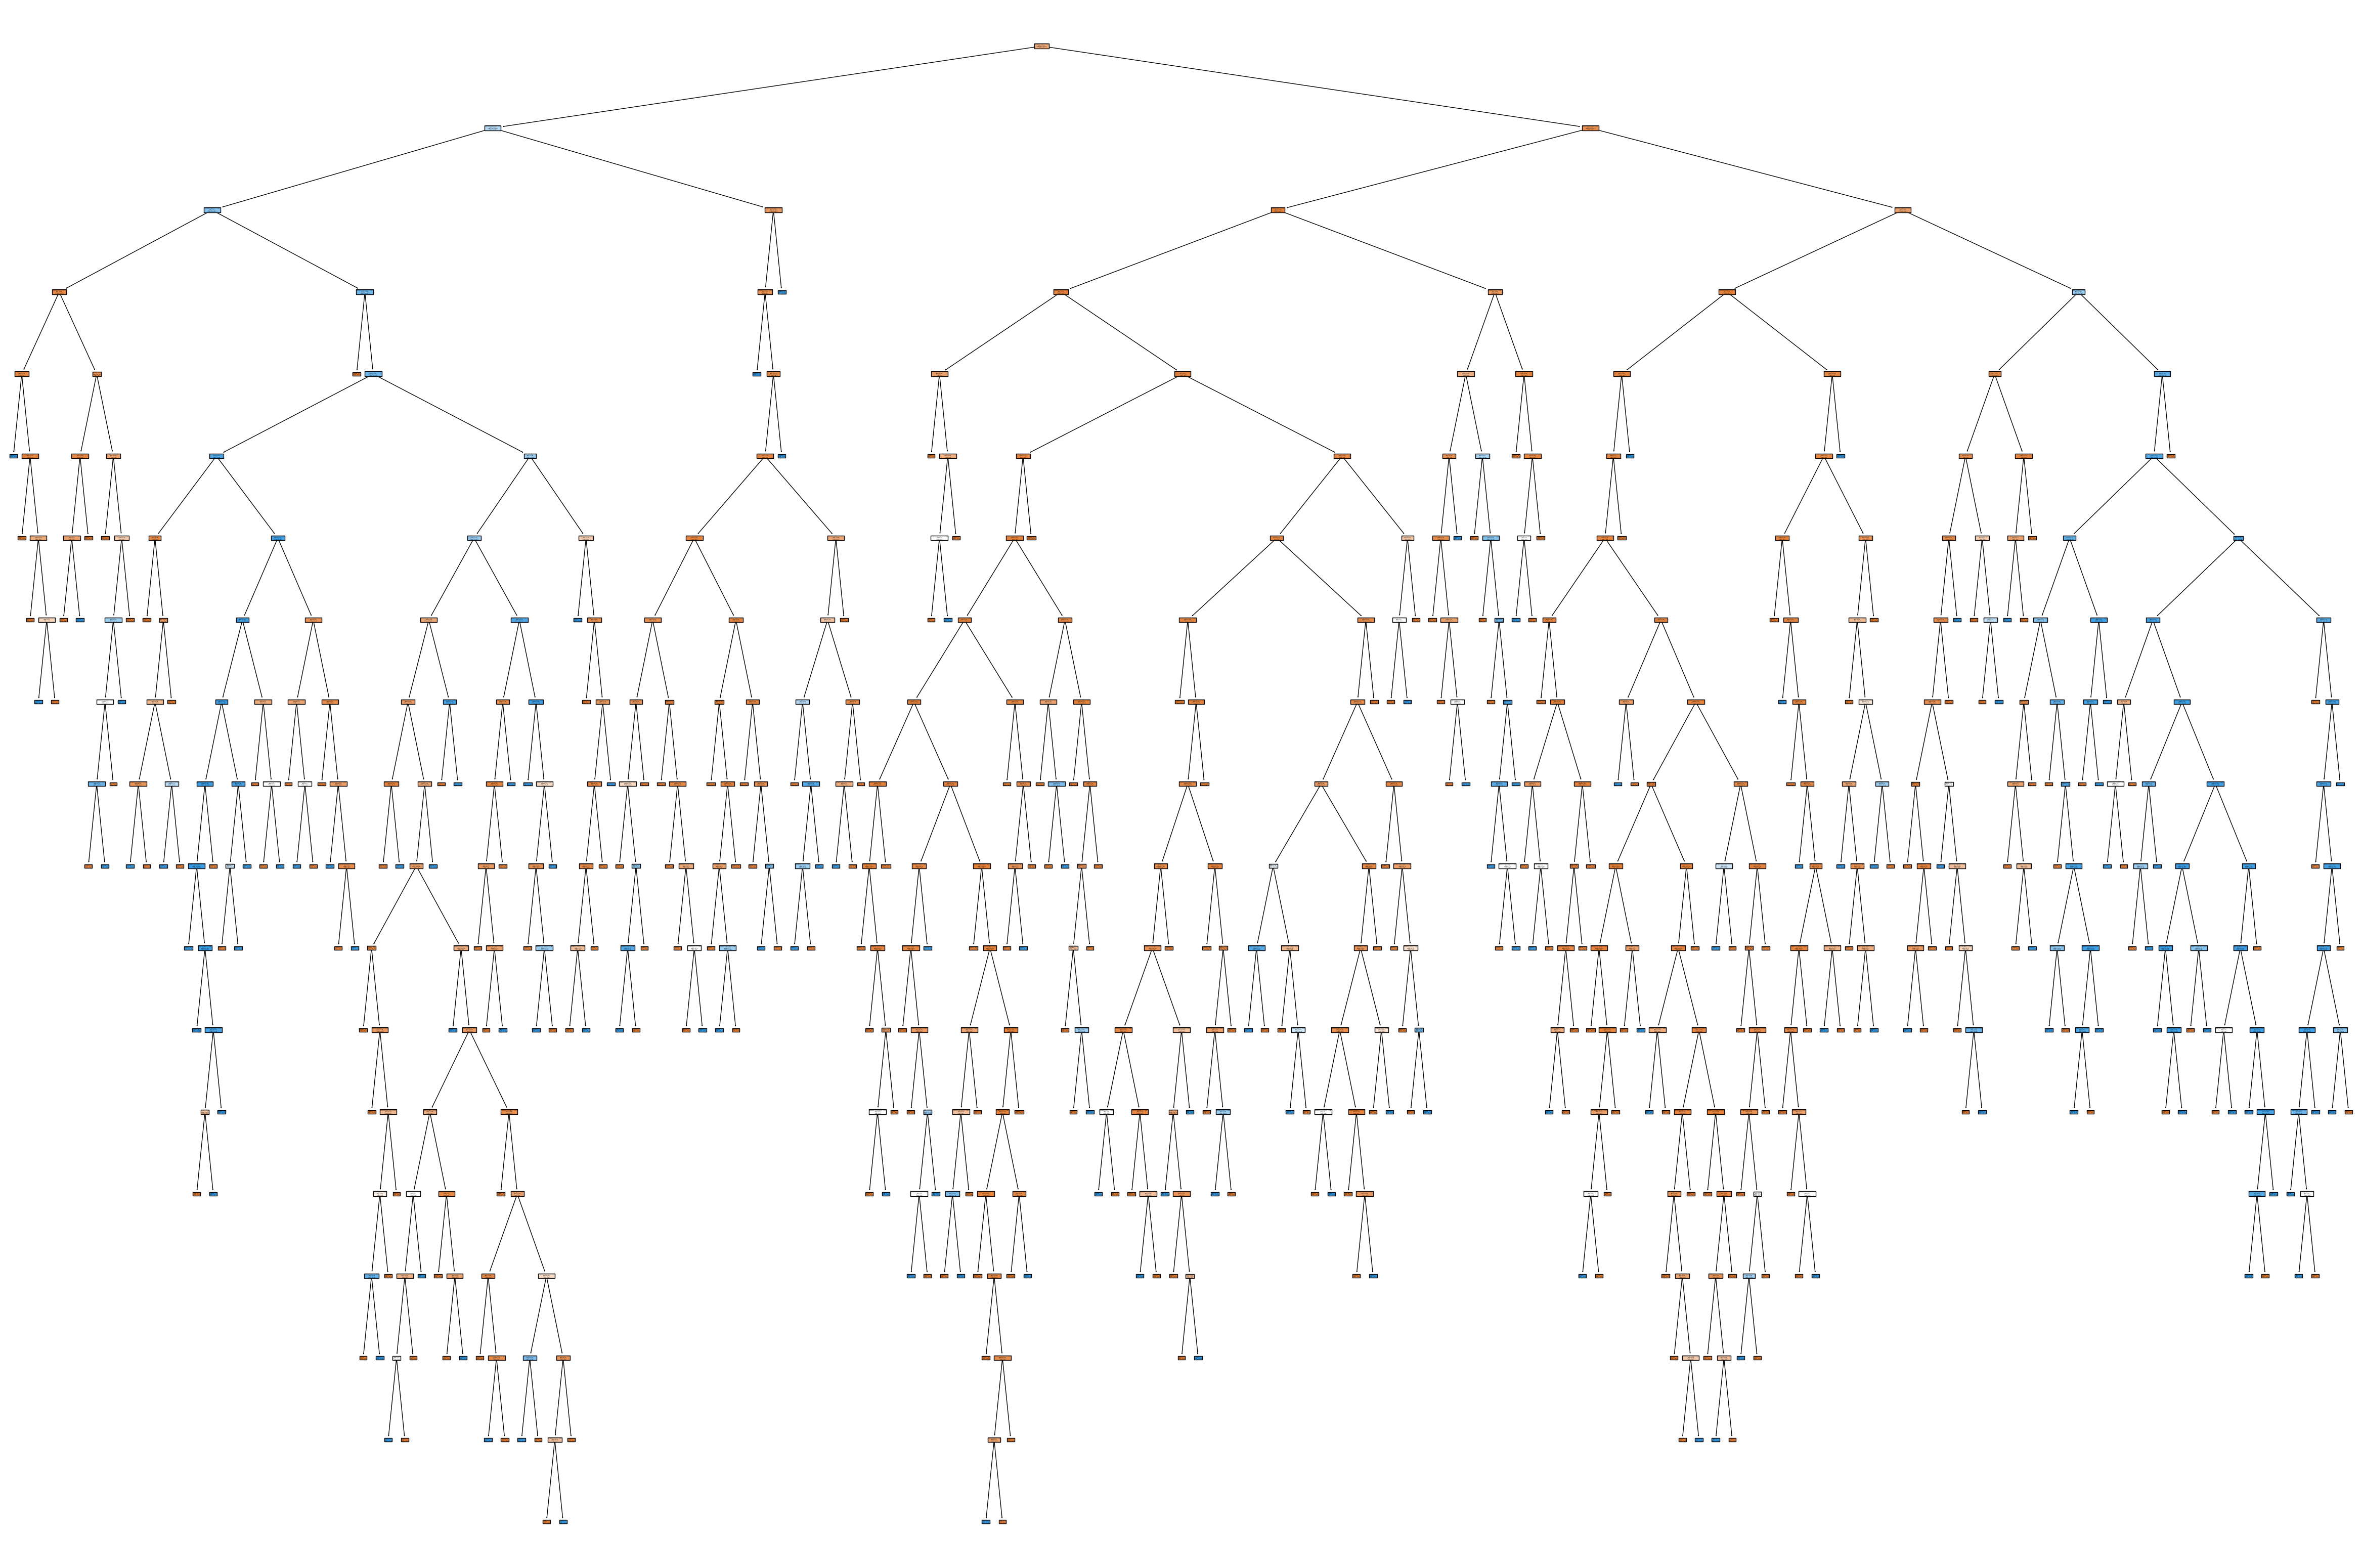

In [ ]:
plt.figure(figsize=(60,40))
plot_tree(rfc.estimators_[5], feature_names = orig.columns,class_names=['left', "stayed"],filled=True);
plt.show()

In [ ]:
# Get numerical feature importances
importances = list(rfc.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:19} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: satisfaction_level  Importance: 0.34
Variable: number_project      Importance: 0.19
Variable: time_spend_company  Importance: 0.19
Variable: average_montly_hours Importance: 0.14
Variable: last_evaluation     Importance: 0.11
Variable: Work_accident       Importance: 0.01
Variable: sales               Importance: 0.01
Variable: salary              Importance: 0.01
Variable: promotion_last_5years Importance: 0.0


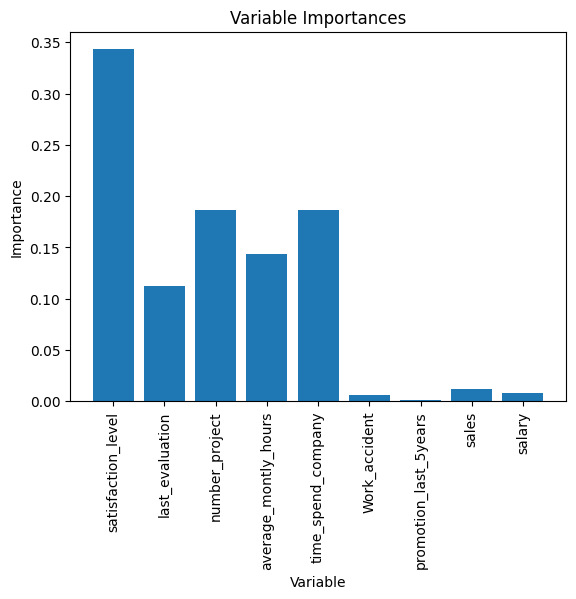

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
x_values = range(len(importances))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

## Naive Bayes

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = GNB.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2824  630]
 [ 308  738]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      3454
           1       0.54      0.71      0.61      1046

    accuracy                           0.79      4500
   macro avg       0.72      0.76      0.73      4500
weighted avg       0.82      0.79      0.80      4500



## Logisitic Regression

In [ ]:
# logistic regression model creation
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

# predictions
lr_predict = lr.predict(X_test)

# evaluation
print(confusion_matrix(y_test, lr_predict))
print(classification_report(y_test, lr_predict))

[[3183  271]
 [ 794  252]]
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3454
           1       0.48      0.24      0.32      1046

    accuracy                           0.76      4500
   macro avg       0.64      0.58      0.59      4500
weighted avg       0.73      0.76      0.73      4500



## Neural Networks

In [ ]:
# neural network model creation
nn = Sequential()
nn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn.add(Dense(32, activation='relu'))
nn.add(Dense(1, activation='sigmoid'))

nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# training
nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

# predictions
nn_prob = nn.predict(X_test)
nn_predict = (nn_prob > 0.5).astype(int)

# evaluation
print(confusion_matrix(y_test, nn_predict))
print(classification_report(y_test, nn_predict))


141/141 [==============================] - 0s 1ms/step
[[3395   59]
 [  68  978]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3454
           1       0.94      0.93      0.94      1046

    accuracy                           0.97      4500
   macro avg       0.96      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500

